## Building a PyTorch model for multiclass classification of images from CIFAR10 dataset

In [ ]:
## Installing packages
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.9/981.9 kB 16.5 MB/s eta 0:00:00


In [ ]:
!pip install scipy

In [ ]:
## Importing dependencies
# Dependencies for data exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dependencies for data loading
from torch.utils.data.dataloader import DataLoader

# Dependencies for building NN model
import torch
from torch import nn

# Dependencies for computer vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Dependencies for model evaluation
import torchmetrics
from torchmetrics import Accuracy

# Check versions of PyTorch
print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")

PyTorch version: 2.6.0+cu124
Torchvision version: 0.21.0+cu124


In [ ]:
## Setting up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Available device: {device}")

Available device: cpu


In [ ]:
## Importing, loading and preparing data

# Setup training data
training_data = datasets.CIFAR10(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),     # transforming images to tensors
    target_transform = None    # don't transform labels
)

# Setup testing data
test_data = datasets.CIFAR10(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 170M/170M [00:03<00:00, 44.7MB/s]


Number of training data: 50000
Number of test data: 10000
Label for this image: 6
Image shape: torch.Size([3, 32, 32])
Permuted image shape: torch.Size([32, 32, 3])
Number of colour channels: 3
Height of picture: 32 pixels
Width of picture: 32 pixels


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

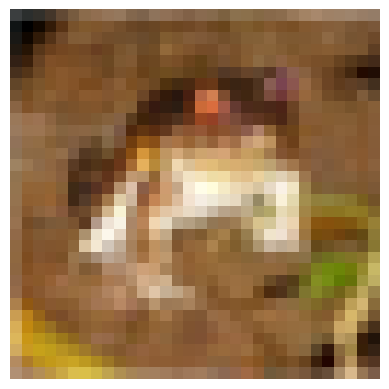

In [ ]:
# Checking number of training and test data
print(f"Number of training data: {len(training_data)}")
print(f"Number of test data: {len(test_data)}")

# Extracting the first training data picture
image, label = training_data[0]

# Checking the height and width of image
num_channels = image.shape[0]
image_height = image.shape[1]
image_width = image.shape[2]

# Checking the label, shape, number of colour channels, height, width and permuting the image shape
print(f"Label for this image: {label}")
print(f"Image shape: {image.shape}")
print(f"Permuted image shape: {torch.permute(image, dims = (1, 2, 0)).shape}")
print(f"Number of colour channels: {num_channels}")
print(f"Height of picture: {image_height} pixels")
print(f"Width of picture: {image_width} pixels")

# Visualizing the first image
plt.imshow(torch.permute(image, dims = (1, 2, 0)))
plt.axis(False)

In [ ]:
# Checking the output labels of the data
class_to_idx = training_data.class_to_idx
class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [ ]:
# Getting the output labels in a list for subplot titles later on
idx_list = np.arange(0, 10, 1)
label_list = [key for idx in idx_list for key, value in class_to_idx.items() if idx == value]
print(idx_list)
print(label_list)

[0 1 2 3 4 5 6 7 8 9]
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


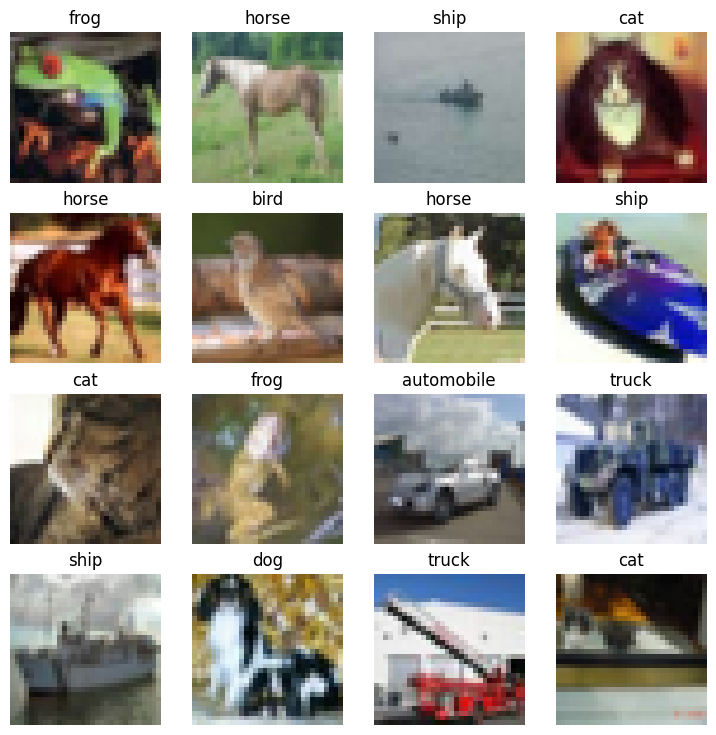

In [ ]:
# Plotting more images randomly from the training data
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

fig = plt.figure(figsize = (9, 9))
rows = 4
cols = 4

for i in range(1, rows*cols + 1):

  # Getting an index randomly for the training data image
  random_idx = torch.randint(0, len(training_data), size = [1]).item()

  # Getting the image based on the random index
  image, label = training_data[random_idx]

  # Plotting the image
  fig.add_subplot(rows, cols, i)
  plt.imshow(torch.permute(image, dims = (1, 2, 0)))
  plt.title(label_list[label])
  plt.axis(False)

In [ ]:
# Preparing dataloader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into an iterable
train_dataloader = DataLoader(dataset = training_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a446eaecd50>, <torch.utils.data.dataloader.DataLoader object at 0x7a446e9a8e90>)
Length of train_dataloader: 1563 batches of 32
Length of test_dataloader: 313 batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

Image size: torch.Size([3, 32, 32])


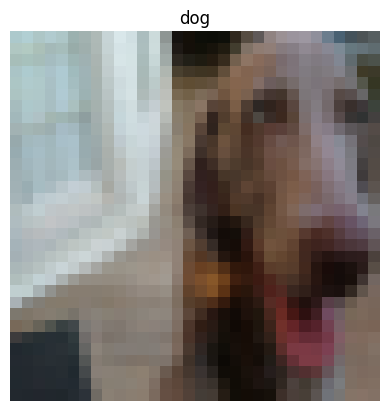

In [ ]:
# Show a sample from the training batch
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(torch.permute(img, dims = (1, 2, 0)))
plt.title(label_list[label])
plt.axis(False)
print(f"Image size: {img.shape}")

In [ ]:
## Building PyTorch model

# Setting hyperparameters for model
HIDDEN_UNITS = 10
KERNEL_SIZE = 3
STRIDE = 1
PADDING = 1
FACTOR = 8*8
LEARNING_RATE = 0.1

class CIFAR10_v0(nn.Module):
  def __init__(self, input_shape: int, HIDDEN_UNITS: int, output_shape: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = HIDDEN_UNITS,
                  kernel_size = KERNEL_SIZE,
                  stride = STRIDE,
                  padding = PADDING),
        nn.ReLU(),
        nn.Conv2d(in_channels = HIDDEN_UNITS,
                  out_channels = HIDDEN_UNITS,
                  kernel_size = KERNEL_SIZE,
                  stride = STRIDE,
                  padding = PADDING),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = HIDDEN_UNITS,
                  out_channels = HIDDEN_UNITS,
                  kernel_size = KERNEL_SIZE,
                  stride = STRIDE,
                  padding = PADDING),
        nn.ReLU(),
        nn.Conv2d(in_channels = HIDDEN_UNITS,
                  out_channels = HIDDEN_UNITS,
                  kernel_size = KERNEL_SIZE,
                  stride = STRIDE,
                  padding = PADDING),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    # Classifier layer (Flatten + Linear)
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = HIDDEN_UNITS*FACTOR,
                  out_features = output_shape)
    )

  def forward(self, x):

    x = self.conv_block_1(x)

    #print(f"Output shape of conv_block_1: {x.shape}")

    x = self.conv_block_2(x)

    #print(f"Output shape of conv_block_2: {x.shape}")

    x = self.classifier(x)

    #print(f"Output shape of classifier: {x.shape}")

    return x

In [ ]:
## Instantiating PyTorch model
model_0 = CIFAR10_v0(input_shape = 3, # number of colour channels
                     HIDDEN_UNITS = HIDDEN_UNITS,
                     output_shape = len(label_list)).to(device)
model_0

CIFAR10_v0(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=10, bias=True)
  )
)

torch.Size([3, 32, 32])


tensor([[-0.0427,  0.0287,  0.0394,  0.0996, -0.0694,  0.0444,  0.0337,  0.0100,
          0.0092,  0.0090]], grad_fn=<AddmmBackward0>)

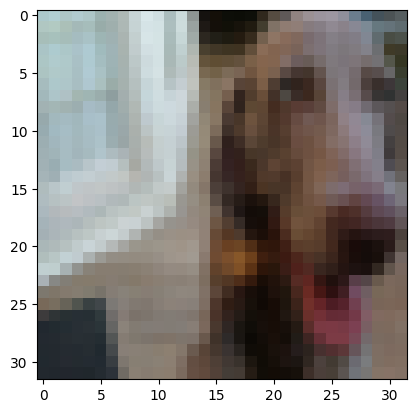

In [ ]:
## Making predictions with untrained model

print(img.to(device).shape)
plt.imshow(torch.permute(img.to("cpu"), dims = (1,2,0)), cmap="gray")

# Checking our model's output by passing a dummy data
model_0(img.unsqueeze(0).to(device))

In [ ]:
## Setting up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = LEARNING_RATE)

# Accuracy
accuracy_fn = Accuracy(task = "multiclass", num_classes=len(label_list)).to(device)

In [ ]:
## Building training and testing loop

## Creating function for a training loop that trains a model on batches of data
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """Performs a training with model trying to learn on data_loader"""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):

    # Sending data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss: .4f} | Train acc: {train_acc: .2f}%")

In [ ]:
## Creating function for a testing loop that tests a model on batches of data
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):

  """Performs testing on model going over data_loader"""

  test_loss, test_acc = 0, 0

  # Putting the model in eval mode
  model.eval()

  with torch.inference_mode():
    for X_test, y_test in data_loader:

      # Sending data to target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      test_pred = model(X_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(test_pred.argmax(dim=1), y_test)

    # Calculate test loss average and test accuracy average per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTest loss: {test_loss: .4f} | Test acc: {test_acc: .2f}%\n")

In [ ]:
# Creating a function to time our experiments
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_gpu = timer()

# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")

  train_step(model = model_0,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)

  test_step(model = model_0,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)


  # Calculating training time
  train_time_end_on_gpu = timer()
  total_train_time_model_0 = print_train_time(start = train_time_start_on_gpu,
                                              end = train_time_end_on_gpu,
                                              device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------

Train loss:  1.9729 | Train acc:  0.27%

Test loss:  1.8398 | Test acc:  0.37%

Train time on cpu:  69.449 seconds
Epoch: 1
------

Train loss:  1.4841 | Train acc:  0.47%

Test loss:  1.4486 | Test acc:  0.48%

Train time on cpu:  136.891 seconds
Epoch: 2
------

Train loss:  1.3654 | Train acc:  0.52%

Test loss:  1.3025 | Test acc:  0.54%

Train time on cpu:  201.491 seconds


In [ ]:
## Making predictions and evaluating model
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):

      # Sending data to target device
      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_pred.argmax(dim=1), y)

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [ ]:
# Get model_2 results dictionary
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'CIFAR10_v0',
 'model_loss': 1.3024524450302124,
 'model_acc': tensor(0.5358)}

In [ ]:
## Making predictions with the trained model

# Visualize predictions on random samples from test dataset by using best-trained model
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  y_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      y_logit = model(sample)
      y_prob = torch.softmax(y_logit.squeeze(), dim=0)
      y_probs.append(y_prob.cpu())

  return torch.stack(y_probs)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=12):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([3, 32, 32])

Text(0.5, 1.0, 'frog')

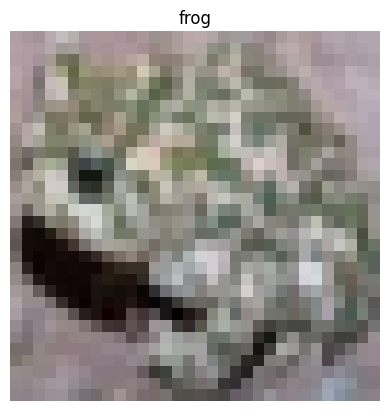

In [ ]:
plt.imshow(torch.permute(test_samples[0], dims=(1, 2, 0)))
plt.axis(False)
plt.title(label_list[test_labels[0]])

In [ ]:
# Make predictions
y_probs = make_predictions(model = model_0,
                           data = test_samples)

y_classes = y_probs.argmax(dim=1)
y_classes

tensor([6, 8, 6, 2, 3, 9, 0, 2, 6, 9, 2, 9])

In [ ]:
test_labels

[6, 1, 5, 0, 3, 9, 0, 6, 3, 1, 2, 9]

ValueError: num must be an integer with 1 <= num <= 9, not 10

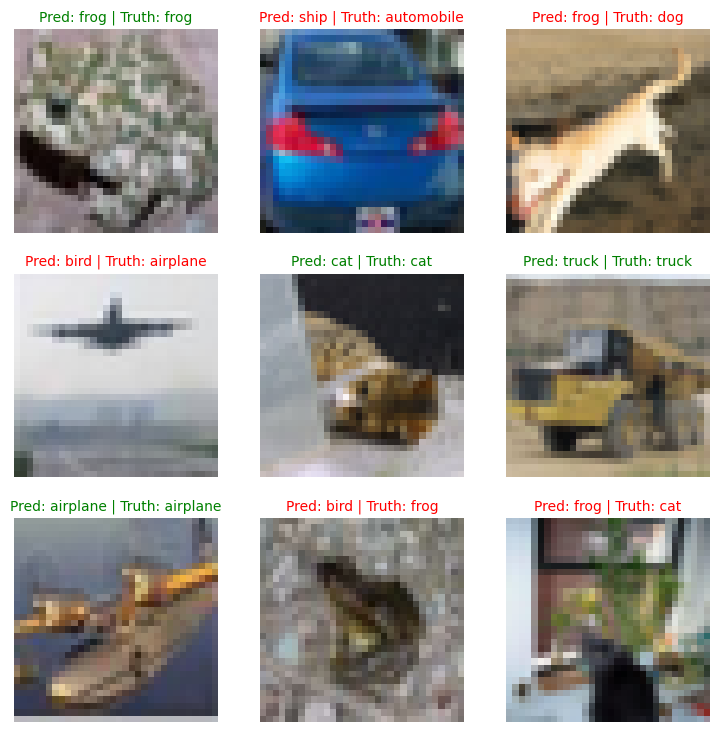

In [ ]:
# Plotting the actual images versus the model's predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(torch.permute(sample, dims = (1, 2, 0)))

  pred_label = label_list[y_classes[i]]

  truth_label = label_list[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

In [ ]:
### Making a confusion matrix for further prediction evaluation

y_preds = []
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    X, y = X.to(device), y.to(device)

    y_logit = model_0(X)

    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([3, 1, 0, 0, 3, 6, 3, 3, 5, 0])

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxttend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4
mlxtend version: 0.23.4


In [ ]:
import mlxtend
print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


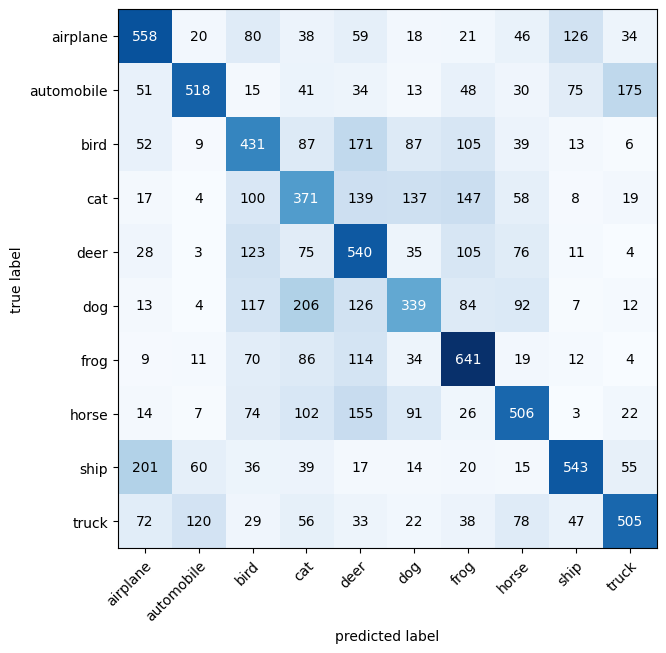

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task = "multiclass", num_classes = len(label_list))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = torch.tensor(test_data.targets))

# Plotting confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),  #matplotlib loves working with numpy
    class_names = label_list,
    figsize = (10, 7)
)